In [1]:
import torch
import pickle
import librosa
import soundfile as sf
import IPython.display as ipd

from constants import *
from inferer import Inferer
from disk_utils import load_model
from plotter import plot_waves, plot_heatmaps

In [2]:
with open("dataset/features/min_max.pkl", "rb") as handle:
    min_max = pickle.load(handle)

inst = "ney"
feature = "db"
mini = min_max[inst]["min"][feature]
maxi = min_max[inst]["max"][feature]

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_magnitude = load_model("generator_sp_32_0_8_full").to(device)

In [5]:
inferer = Inferer(device, mini, maxi, WINDOW_SAMPLE_LEN, OVERLAP, N_FFT, HOP)
signal, _ = librosa.load("dataset/tests/test_0.wav", mono=True, sr=SR)

In [6]:
result_mag = inferer.infer(model_magnitude, signal, use_gl=False, verbose=True)
# model.to(torch.device("cpu"))
# del model

Getting magnitude predictions...
  magnitude 1/12
  magnitude 2/12
  magnitude 3/12
  magnitude 4/12
  magnitude 5/12
  magnitude 6/12
  magnitude 7/12
  magnitude 8/12
  magnitude 9/12
  magnitude 10/12
  magnitude 11/12
  magnitude 12/12
Inverting predictions...
Stitching predictions...


In [7]:
ipd.Audio(signal, rate=SR)

In [9]:
ipd.Audio(result_mag, rate=SR)

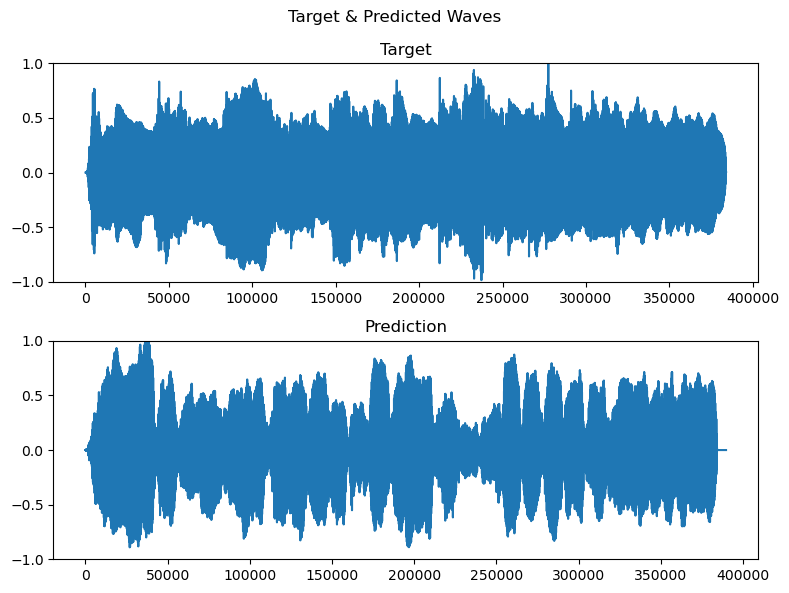

In [10]:
plot_waves(signal, result_mag)

In [9]:
# sf.write("katip_subpix_32.wav", result, SR, format="wav")